# AccelerateAI: LC

## K-Means Clustering

Covers on a sample iris dataset for illustration of 3 metrics:
- Elbow method
- Silhouette Score
- Davies-Bouldin Score

In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples
import numpy as np

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'])
# standardize the data to have a mean of zero and a standard deviation of one
df.iloc[:,:4] = StandardScaler().fit_transform(df.iloc[:,:4])

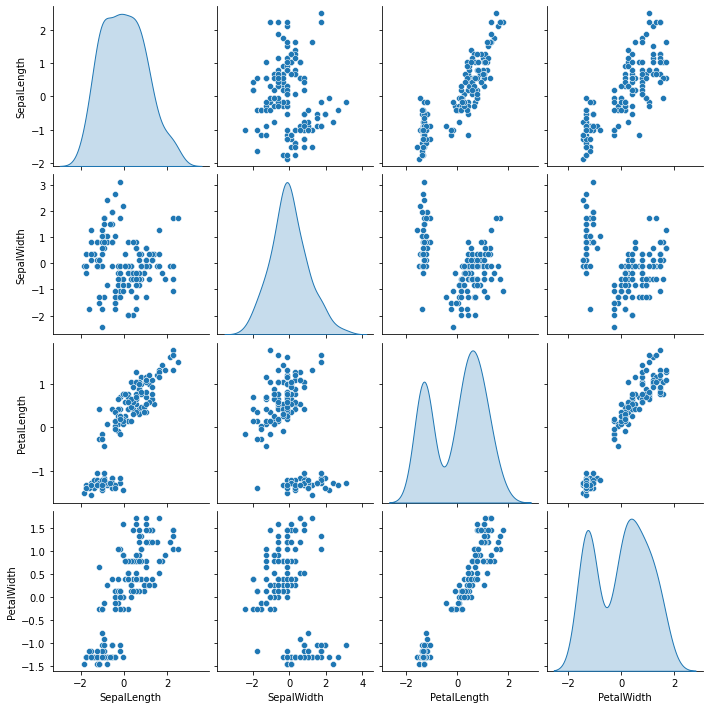

In [3]:
# Exploratory Data Analysis
sns.pairplot(df, diag_kind= 'kde')

plt.show()

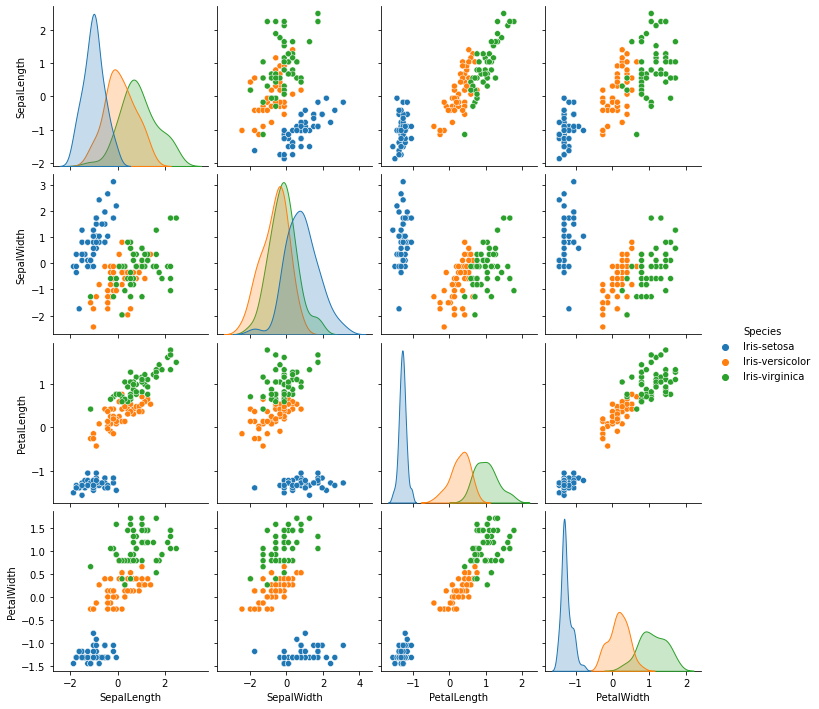

In [4]:
sns.pairplot(df, hue="Species", diag_kind= 'kde')

plt.show()

In [5]:
x = df.iloc[:,:4]
sse, db, slc = {}, {}, {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 1000, n_init = 10, init = 'k-means++', random_state=123).fit(x)
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_
    db[k] = davies_bouldin_score(x, clusters)
    slc[k] = silhouette_score(x, clusters)

### Elbow Method

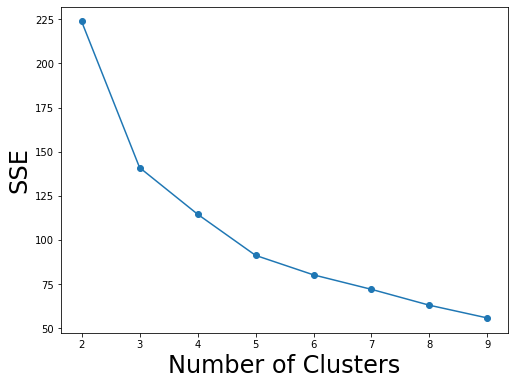

In [6]:
plt.figure(figsize=(8, 6))
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.xlabel('Number of Clusters', fontsize=24)
plt.ylabel('SSE', fontsize=24)
plt.show()

### Silhouette Method

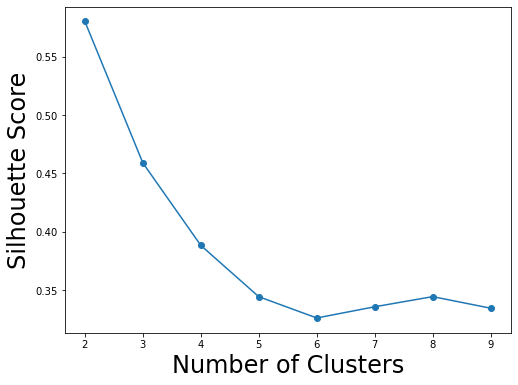

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(list(slc.keys()), list(slc.values()), marker='o')
plt.xlabel('Number of Clusters', fontsize=24)
plt.ylabel('Silhouette Score', fontsize=24)
plt.show()

### Davies-Bouldin Score

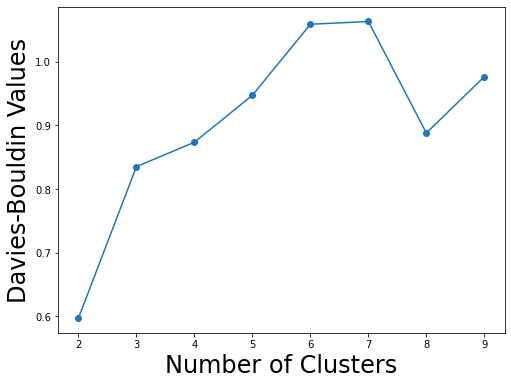

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(list(db.keys()), list(db.values()), marker='o')
plt.xlabel('Number of Clusters', fontsize=24)
plt.ylabel('Davies-Bouldin Values', fontsize=24)
plt.show()

That's all.